In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

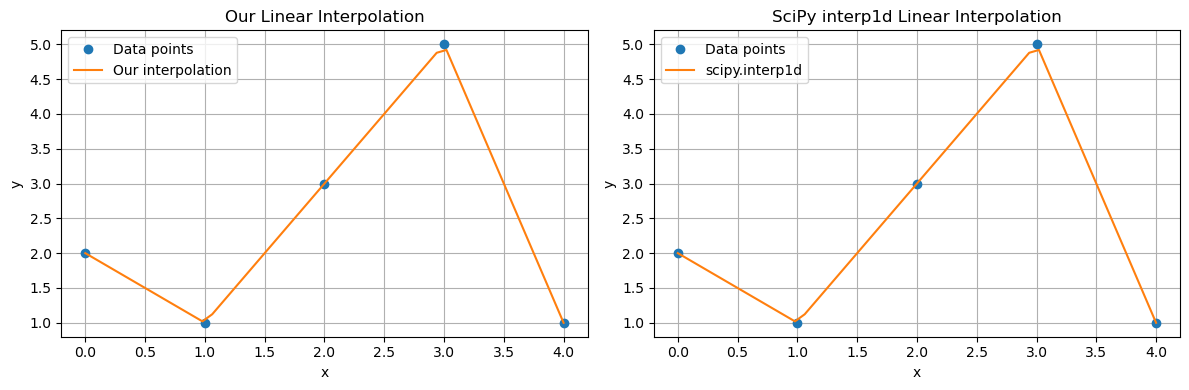

In [22]:
def my_linear_interp(xi, yi, xnew):

    xi = np.array(xi, dtype=float)
    yi = np.array(yi, dtype=float)
    xnew = np.array(xnew, dtype=float)

    ynew = np.zeros_like(xnew)

    # Loop over each xnew value
    for i in range(len(xnew)):
        x = xnew[i]

        if x <= xi[0]:
            ynew[i] = yi[0]
        elif x >= xi[-1]:
            ynew[i] = yi[-1]
        else:
            for j in range(len(xi) - 1):
                if xi[j] <= x <= xi[j + 1]:
                    slope = (yi[j + 1] - yi[j]) / (xi[j + 1] - xi[j])
                    ynew[i] = yi[j] + slope * (x - xi[j])
                    break
    return ynew

x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]
xnew = np.linspace(0, 4, 50)


y_myinterp = my_linear_interp(x, y, xnew)

# SciPy interpolation 
f_scipy = interp1d(x, y, kind='linear')
y_scipy = f_scipy(xnew)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# my plot
ax1.plot(x, y, 'o', label='Data points')
ax1.plot(xnew, y_myinterp, '-', label='Our interpolation')
ax1.set_title("Our Linear Interpolation")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.grid(True)

# SciPy plot
ax2.plot(x, y, 'o', label='Data points')
ax2.plot(xnew, y_scipy, '-', label='scipy.interp1d')
ax2.set_title("SciPy interp1d Linear Interpolation")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

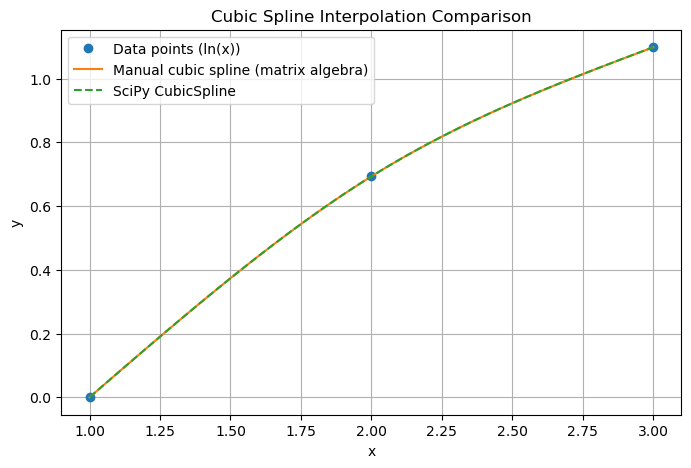

In [23]:
x = np.array([1, 2, 3], dtype=float)
y = np.log(x)  # f(x) = ln(x)

n = len(x)
h = np.diff(x)  # spacing between points

A = np.zeros((n, n))
b = np.zeros(n)

#iboundary conditions
A[0, 0] = 1
A[-1, -1] = 1

# Interior equations
for i in range(1, n - 1):
    A[i, i - 1] = h[i - 1]
    A[i, i]     = 2 * (h[i - 1] + h[i])
    A[i, i + 1] = h[i]
    b[i] = 3 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])

# solve for c coefficients
c = np.linalg.solve(A, b)

a = y[:-1]
b_coef = np.zeros(n - 1)
d = np.zeros(n - 1)

for i in range(n - 1):
    b_coef[i] = (y[i + 1] - y[i]) / h[i] - (2*c[i] + c[i + 1]) * h[i] / 3
    d[i] = (c[i + 1] - c[i]) / (3 * h[i])

xnew = np.linspace(1, 3, 100)
y_manual = np.zeros_like(xnew)
for j in range(len(xnew)):
    # find which interval xnew[j] belongs to
    if xnew[j] <= x[1]:
        i = 0
    else:
        i = 1
    dx = xnew[j] - x[i]
    y_manual[j] = a[i] + b_coef[i]*dx + c[i]*dx**2 + d[i]*dx**3

cs = CubicSpline(x, y, bc_type='natural')
y_scipy = cs(xnew)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='Data points (ln(x))')
plt.plot(xnew, y_manual, '-', label='Manual cubic spline (matrix algebra)')
plt.plot(xnew, y_scipy, '--', label='SciPy CubicSpline')
plt.title("Cubic Spline Interpolation Comparison")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Extrapolation results for f(5.7):
Degree 1     → f(5.7) = -27.630300, error = 30.708170
Degree 2     → f(5.7) = 30.759209, error = 27.681338
Degree 3     → f(5.7) = -20.442916, error = 23.520787
Cubic Spline → f(5.7) = 2.834046, error = 0.243825

True value (100/x^2) = 3.077870


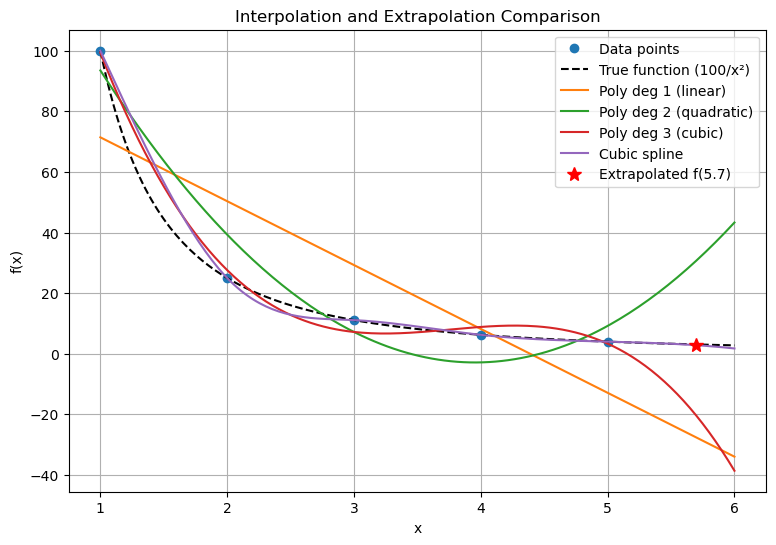

In [24]:
x = np.array([1, 2, 3, 4, 5], dtype=float)
f = np.array([100.000, 25.000, 11.111, 6.250, 4.000], dtype=float)

def true_func(x):
    return 100 / x**2

x_extrap = 5.7
f_true = true_func(x_extrap)

def poly_interp(x, f, degree, x_eval):
# uses numpy.polyfit to create a polynomial of given degree
# and evaluates it at x_eval.
    coeffs = np.polyfit(x, f, degree)
    y_eval = np.polyval(coeffs, x_eval)
    return coeffs, y_eval

results = {}

# linear (n = 1)
c1, f1 = poly_interp(x, f, 1, x_extrap)
results['Degree 1'] = f1

# quadratic (n = 2)
c2, f2 = poly_interp(x, f, 2, x_extrap)
results['Degree 2'] = f2

# cubic (n = 3)
c3, f3 = poly_interp(x, f, 3, x_extrap)
results['Degree 3'] = f3

cs = CubicSpline(x, f, bc_type='natural')
f_spline = cs(x_extrap)
results['Cubic Spline'] = f_spline

print("Extrapolation results for f(5.7):")
for key, val in results.items():
    error = abs(val - f_true)
    print(f"{key:12s} → f(5.7) = {val:.6f}, error = {error:.6f}")

print(f"\nTrue value (100/x^2) = {f_true:.6f}")

x_plot = np.linspace(1, 6, 200)
y_true = true_func(x_plot)

# 
y1 = np.polyval(c1, x_plot)
y2 = np.polyval(c2, x_plot)
y3 = np.polyval(c3, x_plot)
y_spline = cs(x_plot)

plt.figure(figsize=(9,6))
plt.plot(x, f, 'o', label='Data points')
plt.plot(x_plot, y_true, 'k--', label='True function (100/x²)')
plt.plot(x_plot, y1, label='Poly deg 1 (linear)')
plt.plot(x_plot, y2, label='Poly deg 2 (quadratic)')
plt.plot(x_plot, y3, label='Poly deg 3 (cubic)')
plt.plot(x_plot, y_spline, label='Cubic spline')
plt.plot(x_extrap, f_spline, 'r*', markersize=10, label='Extrapolated f(5.7)')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Interpolation and Extrapolation Comparison")
plt.legend()
plt.grid(True)
plt.show()

Manual least squares:  a = 0.4027,  b = 2.0345
NumPy lstsq result:    a = 0.4027,  b = 2.0345


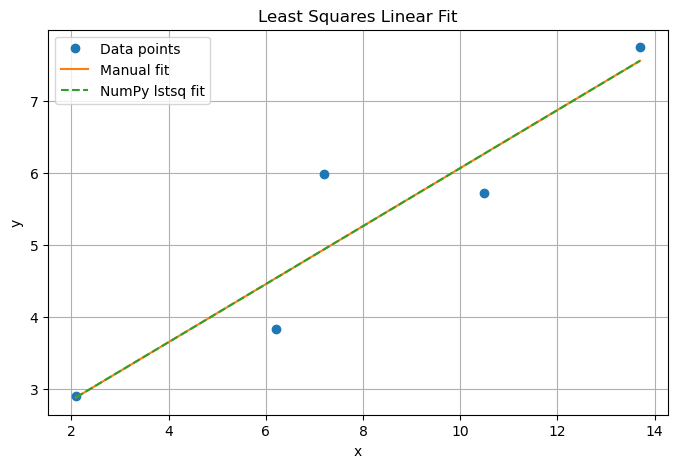

In [25]:
x = np.array([2.1, 6.2, 7.2, 10.5, 13.7])
y = np.array([2.90, 3.83, 5.98, 5.71, 7.74])

# build the design matrix for y = a*x + b
# matrix form: A·p = y  where p = [a, b]
A = np.vstack([x, np.ones_like(x)]).T


# solve manually using normal equations
ATA = A.T @ A
ATy = A.T @ y
params_manual = np.linalg.inv(ATA) @ ATy
a_manual, b_manual = params_manual

# solve with NumPy's built-in lstsq
params_lstsq, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
a_lstsq, b_lstsq = params_lstsq


# print and compare results
print("Manual least squares:  a = %.4f,  b = %.4f" % (a_manual, b_manual))
print("NumPy lstsq result:    a = %.4f,  b = %.4f" % (a_lstsq, b_lstsq))

# plot data and both fits
x_fit = np.linspace(min(x), max(x), 100)
y_manual_fit = a_manual * x_fit + b_manual
y_lstsq_fit = a_lstsq * x_fit + b_lstsq

plt.figure(figsize=(8,5))
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_fit, y_manual_fit, '-', label='Manual fit')
plt.plot(x_fit, y_lstsq_fit, '--', label='NumPy lstsq fit')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Linear Fit")
plt.legend()
plt.grid(True)
plt.show()

Cubic polynomial coefficients:
a = 0.99907, b = -1.00009, c = -8.96614, d = 9.01104


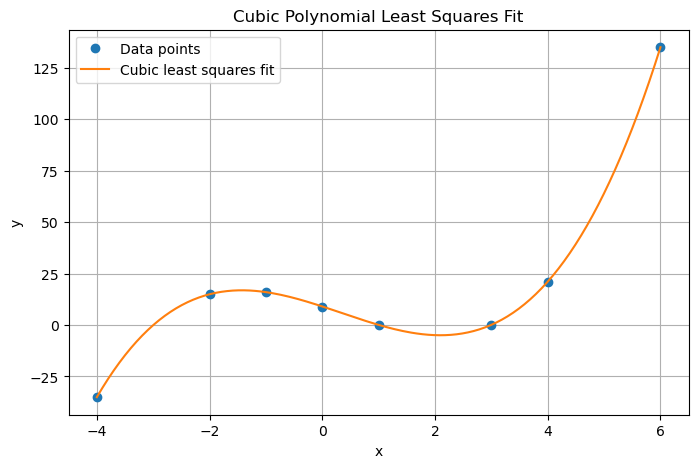

In [26]:
x = np.array([-4, -2, -1, 0, 1, 3, 4, 6], dtype=float)
y = np.array([-35.1, 15.1, 15.9, 8.9, 0.1, 0.1, 21.1, 135], dtype=float)

# build design matrix for cubic polynomial
# each row = [x^3, x^2, x, 1]
A = np.vstack([x**3, x**2, x, np.ones_like(x)]).T

# solve normal equations
ATA = A.T @ A
ATy = A.T @ y
coeffs = np.linalg.inv(ATA) @ ATy
a, b, c, d = coeffs

print("Cubic polynomial coefficients:")
print(f"a = {a:.5f}, b = {b:.5f}, c = {c:.5f}, d = {d:.5f}")

# evaluate model and plot
x_fit = np.linspace(min(x), max(x), 200)
y_fit = a*x_fit**3 + b*x_fit**2 + c*x_fit + d

plt.figure(figsize=(8,5))
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_fit, y_fit, '-', label='Cubic least squares fit')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Polynomial Least Squares Fit")
plt.legend()
plt.grid(True)
plt.show()